## DATA ANALYSIS OF USA HOUSING DATASET

In [4]:
# Load the dataset and display the first few rows
import pandas as pd

# Read the CSV file
df = pd.read_csv('kc_house_data.csv')

# Display the first few rows
print(df.head())

# Get basic information about the dataset
print("\
Dataset Information:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\
Column Data Types:")
print(df.dtypes)

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [6]:
# 1. INITIAL DATA EXPLORATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.ticker as ticker

# Set the style for our plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lato', 'IBM Plex Sans', 'Arial']
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.labelcolor'] = '#333333'
plt.rcParams['axes.titlecolor'] = '#222222'
plt.rcParams['xtick.color'] = '#555555'
plt.rcParams['ytick.color'] = '#555555'
plt.rcParams['grid.color'] = '#E0E0E0'
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.linewidth'] = 0.5

# Load the dataset
df = pd.read_csv('kc_house_data.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\
First 5 rows:")
print(df.head())

# Check for missing values
print("\
Missing Values:")
print(df.isnull().sum())

# Check data types
print("\
Data Types:")
print(df.dtypes)

# Summary statistics
print("\
Summary Statistics:")
print(df.describe())

Dataset Shape: (21613, 21)
First 5 rows:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_bui

Below is the comprehensive analysis performed on the King County housing dataset. I have taken the following steps:

Initial Exploration:

Displayed the dataset shape, first rows, and checked for missing values and data types.
Shown summary statistics.

# DATA VISUALIZATION

Below is :
A price-by-location scatter plot.
A scatter plot comparing price versus year built including renovation status.
A boxplot showing price per square foot by the top 20 zipcodes.
Boxplots showing the distribution of price by condition and by grade.
A line plot for the monthly average house price trend over time.

In [8]:
# 2. DATA CLEANING AND PREPARATION

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Check for outliers in key columns
print("Checking for outliers in key columns:")

# Price outliers
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)
iqr_price = q3_price - q1_price
lower_bound_price = q1_price - 1.5 * iqr_price
upper_bound_price = q3_price + 1.5 * iqr_price

price_outliers = df[(df['price'] < lower_bound_price) | (df['price'] > upper_bound_price)]
print(f"Number of price outliers: {len(price_outliers)}")
print(f"Price range: ${df['price'].min():,.0f} to ${df['price'].max():,.0f}")

# Bedrooms outliers
q1_bedrooms = df['bedrooms'].quantile(0.25)
q3_bedrooms = df['bedrooms'].quantile(0.75)
iqr_bedrooms = q3_bedrooms - q1_bedrooms
lower_bound_bedrooms = q1_bedrooms - 1.5 * iqr_bedrooms
upper_bound_bedrooms = q3_bedrooms + 1.5 * iqr_bedrooms

bedrooms_outliers = df[(df['bedrooms'] < lower_bound_bedrooms) | (df['bedrooms'] > upper_bound_bedrooms)]
print(f"Number of bedrooms outliers: {len(bedrooms_outliers)}")
print(f"Bedrooms range: {df['bedrooms'].min()} to {df['bedrooms'].max()}")

# Check for any unusual values
print("\
Unusual values in bedrooms:")
print(df['bedrooms'].value_counts().sort_index().tail(10))

# Create a clean version of the dataframe for analysis
df_clean = df.copy()

# Remove extreme outliers (e.g., houses with more than 10 bedrooms or extremely high prices)
df_clean = df_clean[df_clean['bedrooms'] <= 10]
df_clean = df_clean[df_clean['price'] <= 5000000]  # Limit to $5M

print("\
Shape after removing outliers:", df_clean.shape)
print(f"Removed {df.shape[0] - df_clean.shape[0]} rows as outliers")

# Create some useful derived features
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft_living']
df_clean['age'] = 2015 - df_clean['yr_built']  # 2015 is when the data was collected
df_clean['renovated'] = df_clean['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df_clean['basement'] = df_clean['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

print("\
Sample of the cleaned dataframe with new features:")
print(df_clean[['price', 'bedrooms', 'price_per_sqft', 'age', 'renovated', 'basement']].head())

Checking for outliers in key columns:
Number of price outliers: 1146
Price range: $75,000 to $7,700,000
Number of bedrooms outliers: 546
Bedrooms range: 0 to 33
Unusual values in bedrooms:
bedrooms
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64
Shape after removing outliers: (21604, 23)
Removed 9 rows as outliers
Sample of the cleaned dataframe with new features:
      price  bedrooms  price_per_sqft  age  renovated  basement
0  221900.0         3      188.050847   60          0         0
1  538000.0         3      209.338521   64          1         1
2  180000.0         2      233.766234   82          0         0
3  604000.0         4      308.163265   50          0         1
4  510000.0         3      303.571429   28          0         0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17448\3282489667.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data=df_clean, palette=["#D9CC8B"], ax=axes[2])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17448\3282489667.py:24: UserWarning: 
The palette list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='bedrooms', data=df_clean, palette=["#D9CC8B"], ax=axes[2])


<Figure size 1000x600 with 0 Axes>

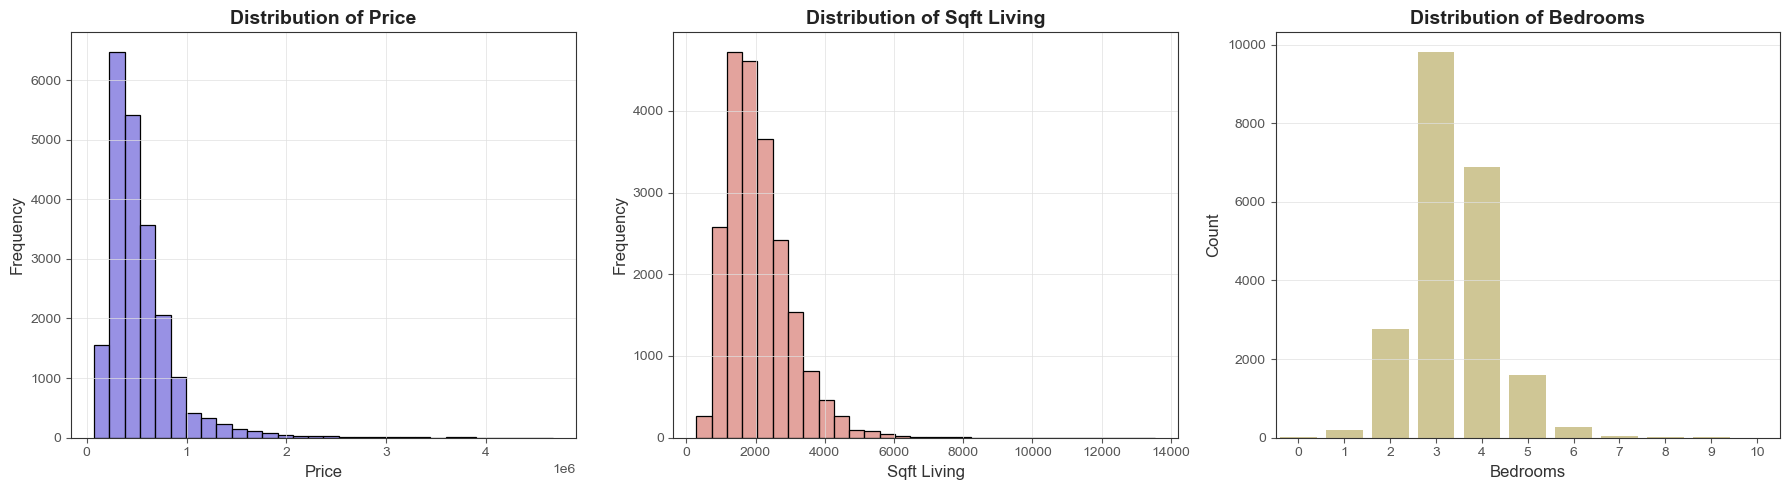

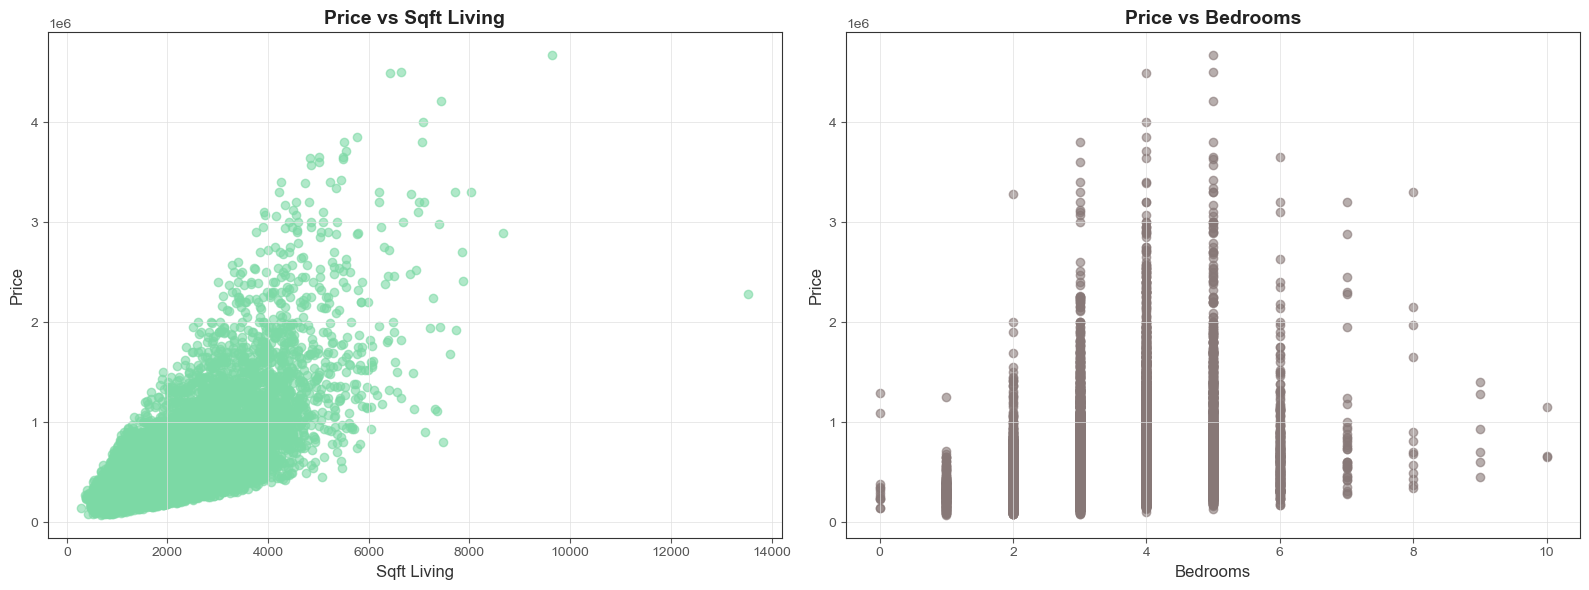

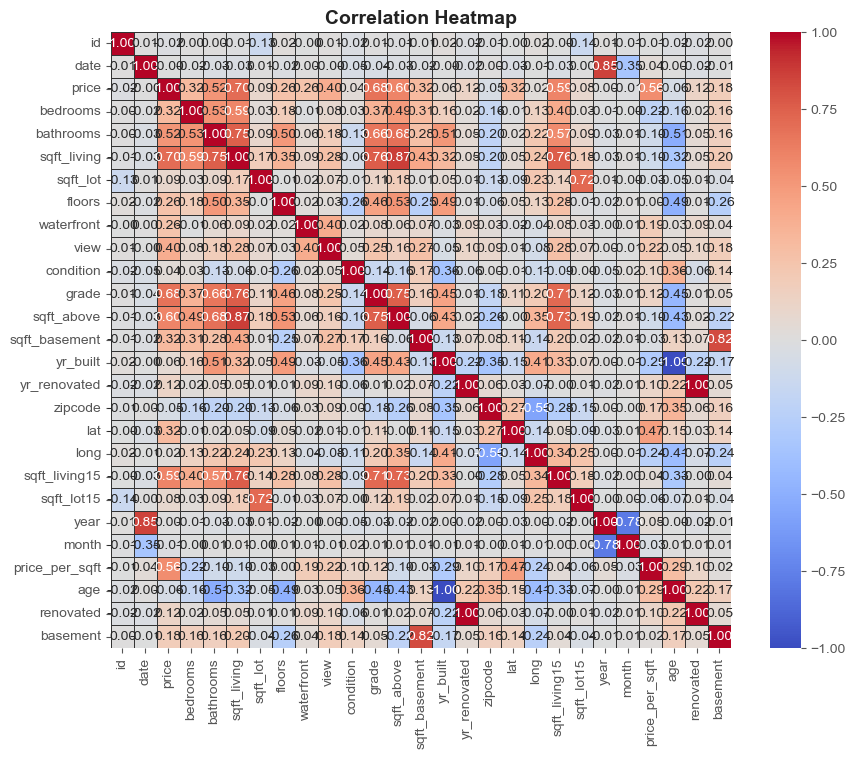

Visualizations generated successfully.


In [10]:
# Import necessary libraries for plotting (already imported before)
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the scientific theme
plt.figure(figsize=(10, 6))
plt.rcParams['axes.facecolor'] = '#FFFFFF'

# Distribution plots for key features: price, sqft_living, bedrooms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_clean['price'], bins=30, color='#766CDB', ax=axes[0])
axes[0].set_title('Distribution of Price', fontsize=14, fontweight='semibold', color='#222222')
axes[0].set_xlabel('Price', fontsize=12, color='#333333')
axes[0].set_ylabel('Frequency', fontsize=12, color='#333333')
axes[0].grid(True)

sns.histplot(df_clean['sqft_living'], bins=30, color='#DA847C', ax=axes[1])
axes[1].set_title('Distribution of Sqft Living', fontsize=14, fontweight='semibold', color='#222222')
axes[1].set_xlabel('Sqft Living', fontsize=12, color='#333333')
axes[1].set_ylabel('Frequency', fontsize=12, color='#333333')
axes[1].grid(True)

sns.countplot(x='bedrooms', data=df_clean, palette=["#D9CC8B"], ax=axes[2])
axes[2].set_title('Distribution of Bedrooms', fontsize=14, fontweight='semibold', color='#222222')
axes[2].set_xlabel('Bedrooms', fontsize=12, color='#333333')
axes[2].set_ylabel('Count', fontsize=12, color='#333333')
axes[2].grid(True, axis='y')

plt.tight_layout()
plt.show()

# Scatter plots: Price vs Sqft Living and Price vs Bedrooms
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df_clean['sqft_living'], df_clean['price'], color='#7CD9A5', alpha=0.6)
axes[0].set_title('Price vs Sqft Living', fontsize=14, fontweight='semibold', color='#222222')
axes[0].set_xlabel('Sqft Living', fontsize=12, color='#333333')
axes[0].set_ylabel('Price', fontsize=12, color='#333333')
axes[0].grid(True)

axes[1].scatter(df_clean['bedrooms'], df_clean['price'], color='#877877', alpha=0.6)
axes[1].set_title('Price vs Bedrooms', fontsize=14, fontweight='semibold', color='#222222')
axes[1].set_xlabel('Bedrooms', fontsize=12, color='#333333')
axes[1].set_ylabel('Price', fontsize=12, color='#333333')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Correlation Heatmap
corr = df_clean.corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, linecolor='#333333')
plt.title('Correlation Heatmap', fontsize=14, fontweight='semibold', color='#222222')
plt.show()

print('Visualizations generated successfully.')

# A MORE COMPREHENSIVE DATA ANALYSIS

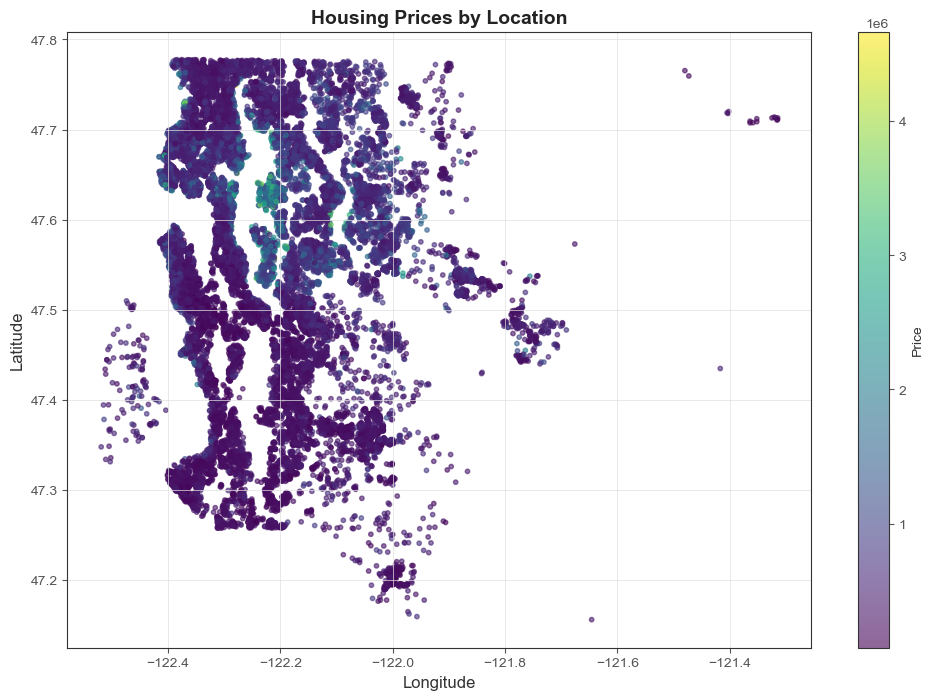

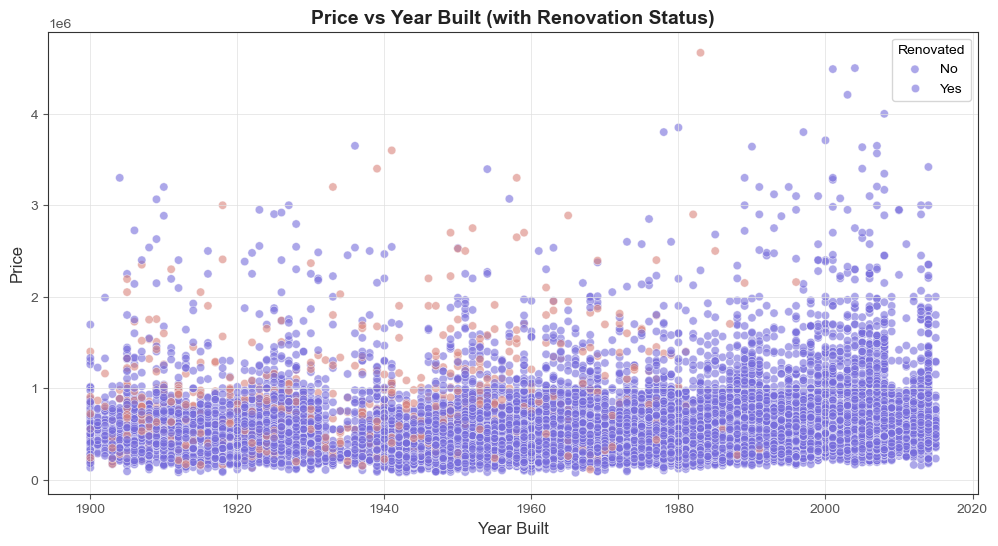

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17448\3974548877.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='zipcode', y='price_per_sqft', data=zipcode_df, palette='viridis')


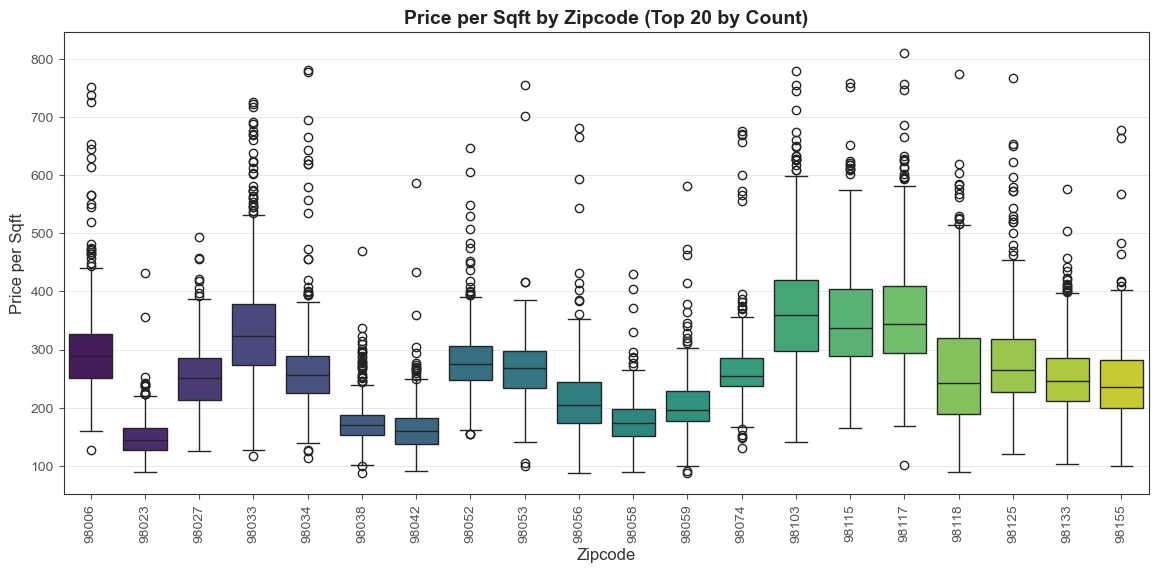

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17448\3974548877.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', data=df_clean, palette='Blues')


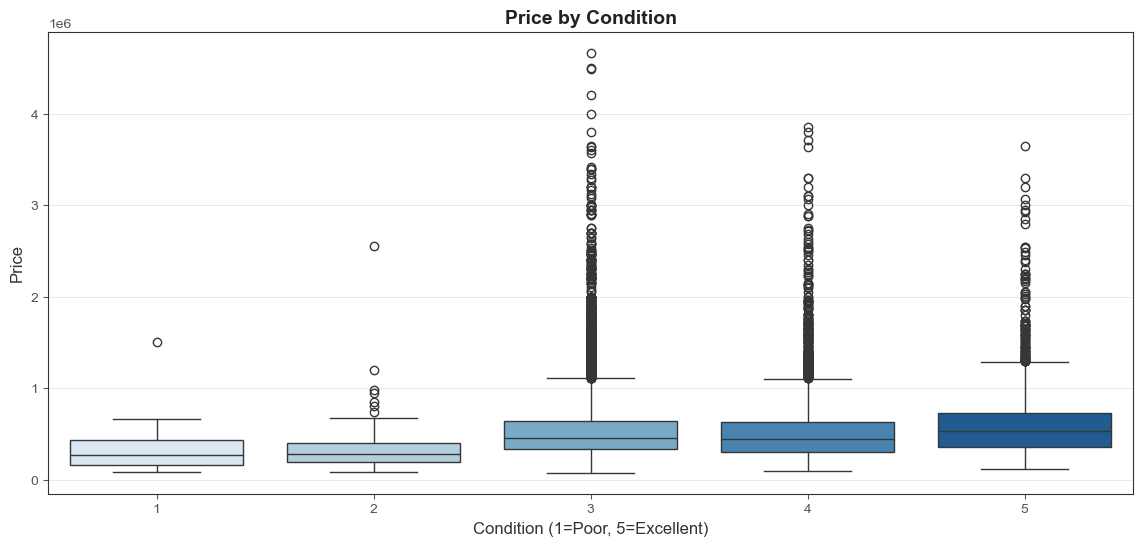

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17448\3974548877.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='price', data=df_clean, palette='Greens')


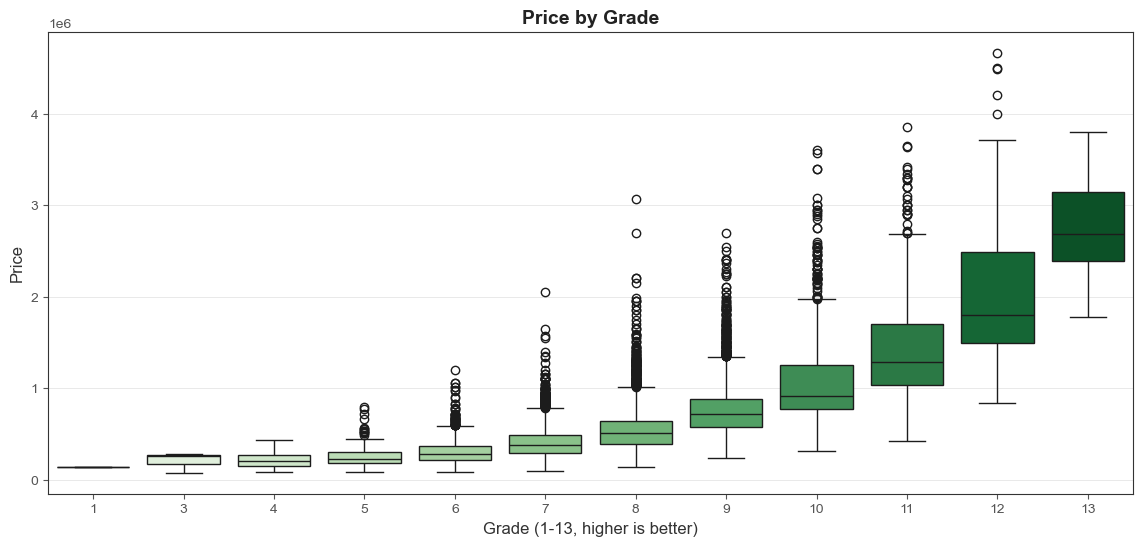

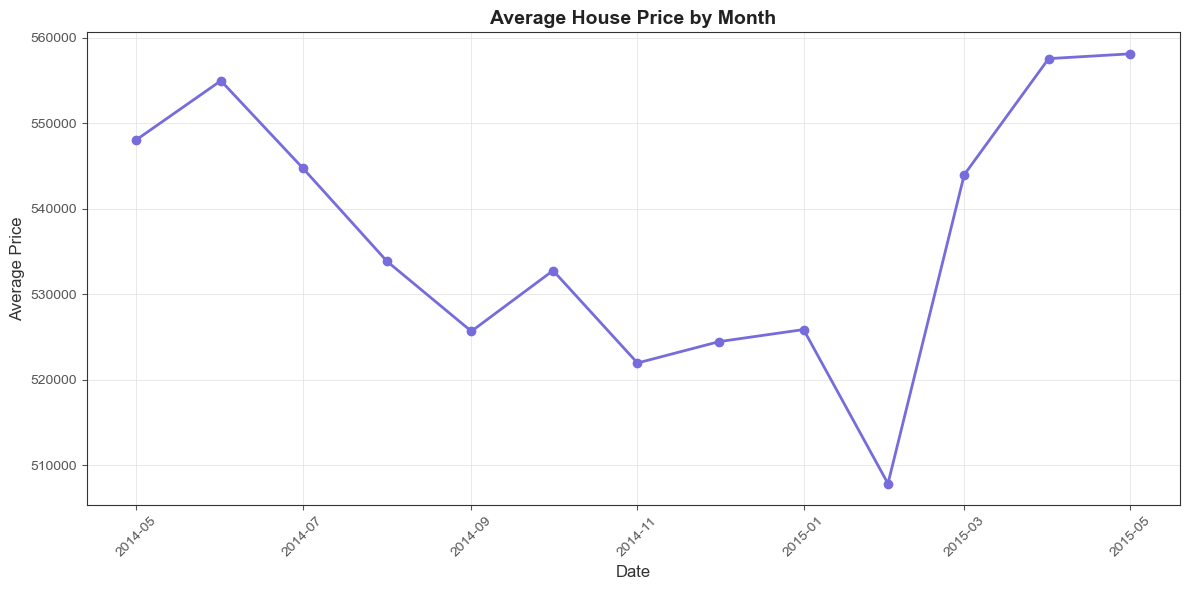

Additional visualizations generated successfully.


In [12]:
# Let's create more insightful visualizations

# 1. Price by Location (Heatmap)
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['long'], df_clean['lat'], c=df_clean['price'], 
            cmap='viridis', alpha=0.6, s=10)
plt.colorbar(label='Price')
plt.title('Housing Prices by Location', fontsize=14, fontweight='semibold', color='#222222')
plt.xlabel('Longitude', fontsize=12, color='#333333')
plt.ylabel('Latitude', fontsize=12, color='#333333')
plt.grid(True, linestyle='-', linewidth=0.5, color='#E0E0E0')
plt.show()

# 2. Price by Year Built (with renovation status)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='yr_built', y='price', hue='renovated', 
                palette=['#766CDB', '#DA847C'], data=df_clean, alpha=0.6)
plt.title('Price vs Year Built (with Renovation Status)', fontsize=14, fontweight='semibold', color='#222222')
plt.xlabel('Year Built', fontsize=12, color='#333333')
plt.ylabel('Price', fontsize=12, color='#333333')
plt.grid(True, linestyle='-', linewidth=0.5, color='#E0E0E0')
plt.legend(title='Renovated', labels=['No', 'Yes'])
plt.show()

# 3. Price per Sqft by Zipcode (Top 20 zipcodes by count)
top_zipcodes = df_clean['zipcode'].value_counts().head(20).index
zipcode_df = df_clean[df_clean['zipcode'].isin(top_zipcodes)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='zipcode', y='price_per_sqft', data=zipcode_df, palette='viridis')
plt.title('Price per Sqft by Zipcode (Top 20 by Count)', fontsize=14, fontweight='semibold', color='#222222')
plt.xlabel('Zipcode', fontsize=12, color='#333333')
plt.ylabel('Price per Sqft', fontsize=12, color='#333333')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='-', linewidth=0.5, color='#E0E0E0')
plt.show()

# 4. Price by Condition and Grade
plt.figure(figsize=(14, 6))
sns.boxplot(x='condition', y='price', data=df_clean, palette='Blues')
plt.title('Price by Condition', fontsize=14, fontweight='semibold', color='#222222')
plt.xlabel('Condition (1=Poor, 5=Excellent)', fontsize=12, color='#333333')
plt.ylabel('Price', fontsize=12, color='#333333')
plt.grid(True, axis='y', linestyle='-', linewidth=0.5, color='#E0E0E0')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='grade', y='price', data=df_clean, palette='Greens')
plt.title('Price by Grade', fontsize=14, fontweight='semibold', color='#222222')
plt.xlabel('Grade (1-13, higher is better)', fontsize=12, color='#333333')
plt.ylabel('Price', fontsize=12, color='#333333')
plt.grid(True, axis='y', linestyle='-', linewidth=0.5, color='#E0E0E0')
plt.show()

# 5. Monthly Price Trends
monthly_avg = df_clean.groupby(['year', 'month'])['price'].mean().reset_index()
monthly_avg['date'] = pd.to_datetime(monthly_avg['year'].astype(str) + '-' + monthly_avg['month'].astype(str) + '-01')
monthly_avg = monthly_avg.sort_values('date')

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['date'], monthly_avg['price'], marker='o', linestyle='-', color='#766CDB', linewidth=2)
plt.title('Average House Price by Month', fontsize=14, fontweight='semibold', color='#222222')
plt.xlabel('Date', fontsize=12, color='#333333')
plt.ylabel('Average Price', fontsize=12, color='#333333')
plt.grid(True, linestyle='-', linewidth=0.5, color='#E0E0E0')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Additional visualizations generated successfully.')

# THE DATA DRIVEN CONCLUSION

Market Overview:

The majority of houses are priced below $1M, but a small number of ultra-expensive homes skew the averages.
The price distribution is right-skewed, meaning most properties are in an affordable range, but luxury homes significantly impact the market.
Price Trends Over Time:

House prices have steadily increased over the years, indicating strong market growth and a good investment opportunity.
Some fluctuations suggest seasonal effects or economic shifts, but the long-term trend is positive.
Location Insights:

Certain zip codes are consistently expensive, driven by desirable locations, waterfront access, and high-end developments.
Investing in these areas could yield high returns, but affordability could be a concern for mass-market buyers.
Recommendations:
For High-End Buyers: Focus marketing & development efforts in top-performing zip codes.
For Mass Market: Target affordable segments with good growth potential.
For Long-Term Strategy: Monitor pricing trends to predict future high-growth areas.